# Summarizing a Quantitative Variable

We have discussed ways to analyze categorical variables, such as **gender**, **class**, and **embarked** in the Titanic data set. Now we will discuss ways to analyze quantitative variables, such as **age** and **fare**.

Note: much of the material in this notebook should be a review from previous Statistics classes. However, there might be some concepts you haven't seen before (e.g., MAD). Also, implementation in Python is likely new to you. So do read carefully from to to bottom as always.

In [1]:
import pandas as pd

In [2]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,3.0,NaN
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff


If a column in a `pandas` `DataFrame` has a numeric type, such as `int64` or `float64`, then the `.describe()` method will automatically produce many of the summaries discussed in this lesson.

In [3]:
df_titanic["age"]

0       42.0
1       13.0
2       16.0
3       39.0
4       16.0
        ... 
2202    41.0
2203    40.0
2204    32.0
2205    20.0
2206    26.0
Name: age, Length: 2207, dtype: float64

In [4]:
df_titanic["age"].describe()

count    2205.000000
mean       30.436735
std        12.159677
min         0.166667
25%        22.000000
50%        29.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

Three important features of the distribution of a quantitative variables are

- Center
- Variability (or spread)
- Shape

### Measures of Center

Some statistics measure the _center_ of a variable. Two commonly used measures of the center are:

- the _mean_ (a.k.a. average): the sum of the values divided by the count. If the values are represented by the variables $x_1, x_2, ..., x_n$, then the mean $\bar x$ is defined as
$$ \bar x = \frac{1}{n} \sum_{i=1}^n x_i. $$
- the _median_: the middle value when you sort the values (i.e., a value such that 50% of the values lie below and 50% of the values lie above)

A measure of center gives us information about the "typical" value of a variable. For example, you might not know whether a typical fare on the Titanic was £1, £10, or £100. But if we calculate the mean:

In [7]:
df_titanic.fare.mean()
# df_titanic["fare"].mean()

33.40476049573974

we see that a typical fare is around £30.

Let's see what the median says about the "typical" fare:

In [8]:
df_titanic.fare.median()

14.0902

The median is quite different from the mean! It says that about 50% of the passengers paid less than £15 and about 50% paid more, so another reasonable value for the "typical" fare is £15.

The mean was twice the median! What explains this discrepancy? The reason is that the mean is very sensitive to extreme values. To see this, let's look at the highest fare that any passenger paid.

In [9]:
df_titanic.fare.max()

512.0607

The highest fare paid was over £500! Even if most passengers paid less than £15, extreme values like this one will pull the mean upward. On the other hand, since the median is always the middle value, it is not affected by the extreme values, as long as the ordering of the values does not change.

To drive this point home, let's see what would happen to the mean and median if that maximum fare were (hypothetically) £10,000 instead of £512.

In [10]:
fare_10k = df_titanic.fare.replace(df_titanic.fare.max(), 10000)
fare_10k.mean(), fare_10k.median()

(62.80193880712625, 14.0902)

Notice how the mean now increases to over £60, but the median is unaffected.

Just to satisfy our curiosity, let's learn more about this passenger who paid the maximum fare. To do this, we have to find the row that achieved this maximum value. Fortunately, there is a convenient `pandas` function, `.idxmax()`, that returns the _row index_ of the maximum fare. (A mathematician might call this the ["arg max"](https://en.wikipedia.org/wiki/Arg_max).)

In [11]:
df_titanic.fare.idxmax()

197

Now we can select the row corresponding to this index using `.loc`.

In [12]:
df_titanic.loc[df_titanic.fare.idxmax()]

name        Cardeza, Mrs. Charlotte Wardle
gender                              female
age                                   58.0
class                                  1st
embarked                                 C
country                      United States
ticketno                           17755.0
fare                              512.0607
survived                                 1
pclass                                 1.0
crew                                   NaN
Name: 197, dtype: object

The median is a number below which 50% of the values fall. What if we want to know some other percentile? We can use the `.quantile()` function, which takes a percentile rank (between 0 and 1) as input and returns the corresponding percentile.

For example, the 75th percentile is:

In [13]:
df_titanic.fare.quantile(.75)

31.06075

which is pretty close to the mean. So only about 25% of the passengers paid more than the mean! The mean is not a great measure of center in the sense of "typical" when there are extreme values, as in this data set.

To summarize, we have encountered several `pandas` functions that can be used to summarize a quantitative variable:

- `.mean()` calculates the mean or average.
- `.median()` calculates the median.
- `.quantile(q)` returns a value such that a fraction `q` of the values fall below that value (in other words, the (100q)th percentile).
- `.max()` calculates the maximum value.
- `.idxmax()` returns the index of the row with the maximum value. *If there are multiple rows that achieve this value, then it will only return the index of the first occurrence.*

The corresponding functions for the _minimum_ value exist as well:

- `.min()` calculates the minimum value.
- `.idxmin()` returns the index of the row with the minimum value. *If there are multiple rows that achieve this value, then it will only return the index of the first occurrence.*

In [14]:
df_titanic.fare.min()

3.0305

In [15]:
df_titanic.loc[df_titanic.fare.idxmin()]

name        Olsen, Master. Artur Karl
gender                           male
age                               9.0
class                             3rd
embarked                            S
country                        Norway
ticketno                      17368.0
fare                           3.0305
survived                            1
pclass                            3.0
crew                              NaN
Name: 906, dtype: object

### Measures of Variability

The center of a quantitative variable only tells a small part of the story. For one, it tells us nothing about how spread out the values are. Therefore, it is important to also report a measure of the degree of _variability_. The measures of variability that we will explore in this section are:

- mean absolute deviation
- variance
- standard deviation

Let's investigate a few measures of variability that are built into `pandas`. For completeness, the formulas for these statistics are provided, where $x_1, ..., x_n$ represent the values and $\bar x$ their mean. But the intuition is more important to understand than the formulas.

The first statistic that might come to mind is the _mean absolute deviation_, or _MAD_. To calculate the MAD, we first calculate the difference between each observation and the mean. Values below the mean will have a negative difference, while values above the mean will have a positive difference. We don't want the negative differences to cancel out the positive differences, since _all_ of them contribute to the overall degree of variability. So we take the absolute value of all the differences and then average.

$$
\begin{align*}
\textrm{MAD} &= \textrm{mean of } |x_i - \bar x| \\
&= \frac{1}{n} \sum_{i=1}^n |x_i - \bar x|
\end{align*}
$$

We can implement the MAD ourselves using the `.mean()` and `.abs()` functions.

In [16]:
# STEP 1: Calculate the difference between each fare and the mean.
(df_titanic.fare - df_titanic.fare.mean())

0      -26.29476
1      -13.35476
2      -13.35476
3      -13.35476
4      -26.27476
          ...   
2202         NaN
2203         NaN
2204         NaN
2205         NaN
2206         NaN
Name: fare, Length: 2207, dtype: float64

In [17]:
# STEP 2: Calculate the absolute value of each difference.
(df_titanic.fare - df_titanic.fare.mean()).abs()

0       26.29476
1       13.35476
2       13.35476
3       13.35476
4       26.27476
          ...   
2202         NaN
2203         NaN
2204         NaN
2205         NaN
2206         NaN
Name: fare, Length: 2207, dtype: float64

In [18]:
# STEP 3: Take the mean of these absolute differences.
(df_titanic.fare - df_titanic.fare.mean()).abs().mean()

30.053517846306516

Notice that in Step 1, we subtracted a single number (`df_titanic.fare.mean()`) from a Pandas `Series` (`df_titanic.fare`). Pandas  automatically _broadcasted_ the subtraction over each number in the `Series`.

The `.abs()` function in Step 2 is an example of a _vectorized_ function. The absolute value function is applied to each element of the `Series`.

The MAD is currently built into Pandas as `mad` (but see the next note in the next text cell). Let's check that we get the same answer when we call the built-in *function*.



In [19]:
df_titanic.fare.mad()

AttributeError: 'Series' object has no attribute 'mad'

Note: `mad` is *deprecated* in Pandas, which means it will eventually be removed. On reason why is that MAD is also used to represent *median* absolute deviation, and "mad" in different software packages might mean different things. You can be explicit about the version --- mean AD versus median AD --- by writing the code from scratch as we have done above.

Some fares are close to the mean, and some are far from the mean. On average, fares are about £30 away from the mean.

A different way to ensure that the negative and positive differences don't cancel is to square all the differences before averaging. This leads to the definition of _variance_.

\begin{align}
\textrm{Variance} &= \textrm{mean of } (x_i - \bar x)^2 \\
&= \frac{1}{n} \sum_{i=1}^n (x_i - \bar x)^2
\end{align}

We can implement the variance ourselves. Again, notice how the subtraction and the power operations are broadcast over the elements of the `Series`.

In [20]:
((df_titanic.fare - df_titanic.fare.mean()) ** 2).mean()

2725.6084735888962

Alternatively, we can simply call the `.var()` function in `pandas`.

In [21]:
df_titanic.fare.var()

2727.721348374624

You might be surprised that `.var()` produced a slightly different number. This is because `pandas` divided by $n-1$ (rather than $n$) in calculating the mean of the squared differences. That is, the default variance formula that `pandas` uses is

$$\text{Variance} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2.$$

To force Pandas to divide by $n$, you can set `ddof=0`.

In [22]:
df_titanic.fare.var(ddof=0)

2725.6084735888962

Whether you divide by $n$ or $n-1$ typically only makes a practical difference in small data sets.

The trouble with variance is that its units are wrong. If the original values $x_1, ..., x_n$ are in £, the variance would be in squared £. This is obvious if you simply look at the magnitude of the variance in the example above; the variance is in the _thousands_, even though the largest fare is just over £500.  To correct the units of variance, we take the square root to obtain a more interpretable measure of variability, called the _standard deviation_:

$$\textrm{SD} = \sqrt{\textrm{Variance}}.$$

In [23]:
df_titanic.fare.std()

52.22759183012964

Standard deviation has a similar interpretation to MAD: roughly, on "average" fares are about £52 away from the mean. However, note the difference in values between the MAD and SD. The SD squares deviations before averaging, and values with large deviations have even larger squared deviations.

Standard deviation is the most widely used measure of variability, more common than the MAD. At first, this might seem odd. To calculate the standard deviation, we squared the differences from the mean, only to take a square root in the end. Why bother with this rigmarole, when we could just calculate absolute values instead?

The reasons for preferring the standard deviation are complicated. But the short answer is that the variance (i.e., the square of the standard deviation) is much nicer mathematically. Remember the Pythagorean theorem: it's $a^2 + b^2 = c^2$, so working with squared values is natural; something similar happens with variance. Also, if you know calculus, you might remember that the absolute value function does not have a derivative at 0. Therefore, the MAD is not _differentiable_, which makes it inconvenient mathematically.

However, MAD is not necessarily any better or worse as a measure of variability than SD. Each measures variability in a particular way, and each has advantages and disadvantages.

## Visualizing a Quantitative Variable

Graphics can help us understand how the values of a quantitative variable are distributed. We will study two types of visualizations for quantitative variables: histograms and densities.

### Histograms

The standard visualization for a single quantitative variable is the _histogram_. A histogram sorts the values into bins and uses bars to represent the number of values in each bin.

To make a histogram, we call the `.plot.hist()` method of the selected variable.

<Axes: ylabel='Frequency'>

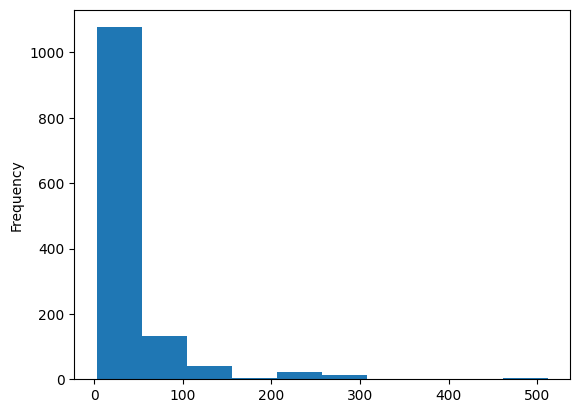

In [24]:
df_titanic.fare.plot.hist()

It seems that we did not get enough resolution to really determine what is going on at the lower end of the scale. Let's ask for more bins.

<Axes: ylabel='Frequency'>

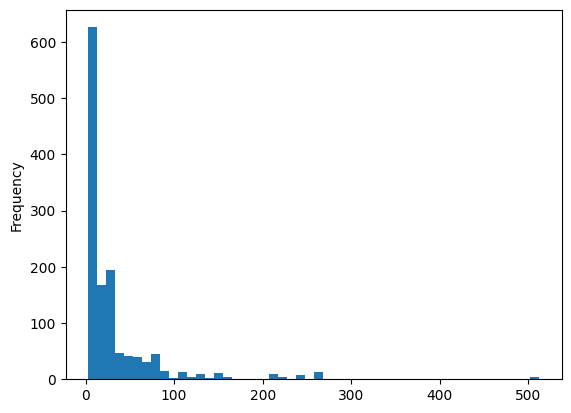

In [25]:
df_titanic.fare.plot.hist(bins=50)

From this graph, we see a concentration of values around 10-30 (which we previously identified as the "center") and a "typical" deviation of 30-50 (which we previously identified as the "variability"). We also see the outlier who paid more than £500. We also see features that were not obvious before: the skewed shape of the distribution, the gap between £300 and £500, and so on. This single picture has managed to convey more information than a dozen summary statistics.

We might want to plot multiple histograms on the same graphic to make for easy comparison. To do this, we simply make multiple calls to plotting functions within the same cell. For example, if we wanted to compare the distributions of the ages of 1st class and 3rd class passengers, we could call `.plot.hist()` twice.

<Axes: ylabel='Frequency'>

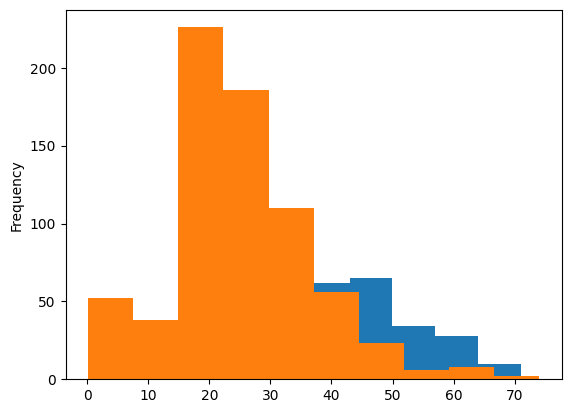

In [26]:
df_titanic[df_titanic["class"] == "1st"]["age"].plot.hist()
df_titanic[df_titanic["class"] == "3rd"]["age"].plot.hist()

Notice that `pandas` automatically plotted the two histograms using different colors. There are two problems with this plot. First, we don't know which color corresponds to which variable. Second, we cannot see the blue histogram underneath the orange histogram because the colors are opaque.

To solve the first problem, we add a legend for each variable by specifying `legend=True`. The label that will be used in the legend will be the name of the `Series` by default; to customize this, we can specify the label using `label=`.

To solve the second problem, we set the transparency `alpha`, which is a number between 0 and 1, with 0 being perfectly transparent and 1 being completely opaque. Try varying `alpha` to get a feel for what it does.

<Axes: ylabel='Frequency'>

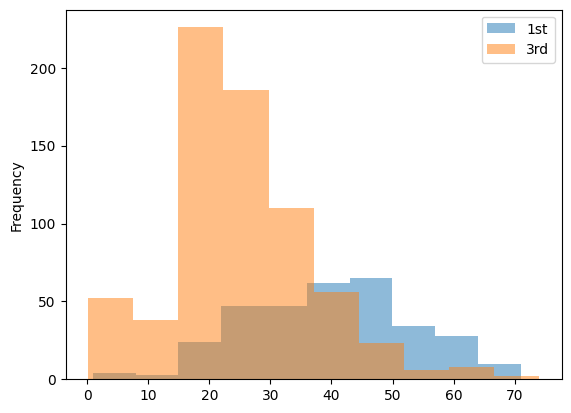

In [27]:
df_titanic[df_titanic["class"] == "1st"]["age"].plot.hist(
    label="1st", legend=True, alpha=0.5
)
df_titanic[df_titanic["class"] == "3rd"]["age"].plot.hist(
    label="3rd", legend=True, alpha=0.5
)

### Densities

Another way to visualize the distribution of a quantitative variable is by plotting its **density**. A density plot turns the jagged histogram into a smooth curve, allowing the user to focus on the general shape of the distribution.

<Axes: ylabel='Density'>

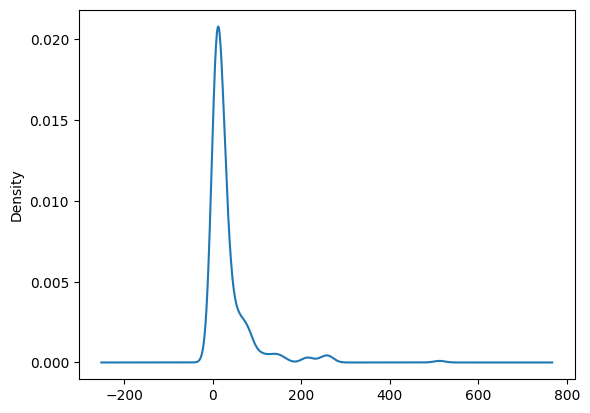

In [31]:
df_titanic.fare.plot.density()

The x-axis is too wide. (You cannot have negative fares.) We can set the limits of the x-axis manually using the `xlim` argument.

<Axes: ylabel='Density'>

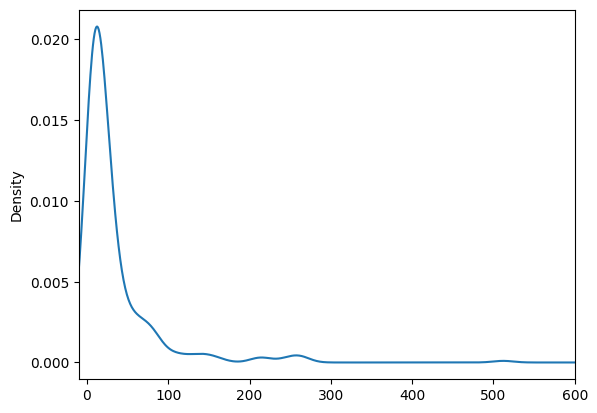

In [32]:
df_titanic.fare.plot.density(xlim=(-10, 600))

Let's superimpose this density curve on top of the histogram, by making two calls to plotting functions:

<Axes: ylabel='Density'>

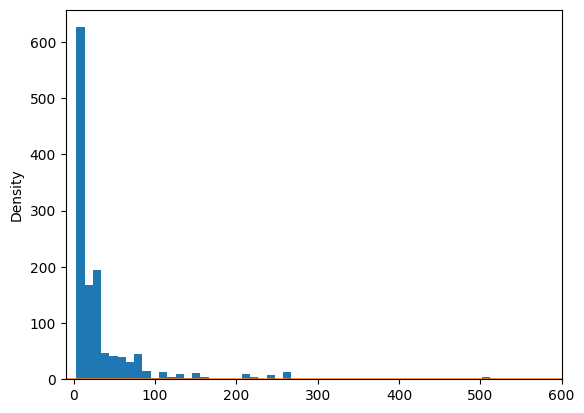

In [33]:
df_titanic.fare.plot.hist(bins=50)
df_titanic.fare.plot.density(xlim=(-10, 600))

If you squint at this plot, you will see an orange line at the bottom of the plot. This is supposed to be the density. But why does it appear as a flat line? The y-axis offers a hint. When we made the density plot earlier, the y-axis extended from 0 to about 0.02. Now the y-axis extends all the way to 500. On such a scale, a curve that fluctuates between 0 and 0.02 will appear to be a flat line!

The problem is that the histogram and the density are currently on different scales. By default, histograms display counts, while densities display distributions. In other words, densities are normalized so that the total *area* under the curve is 1. To be able to display a histogram and density on the same graph, we have to normalize the histogram so that the total area of the bars is 1. We can do this by setting the option `density=True`.

<Axes: ylabel='Density'>

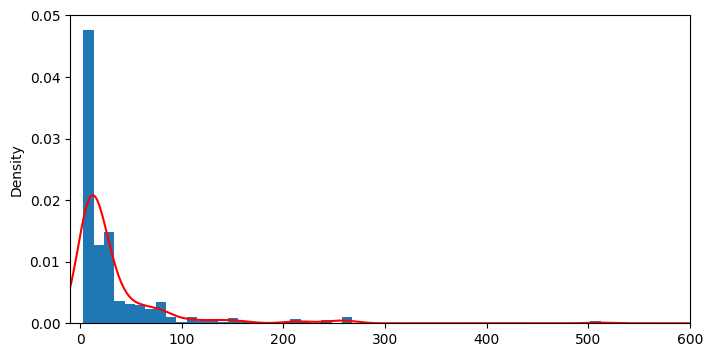

In [42]:
df_titanic.fare.plot.hist(bins=50, density=True, figsize=(8, 4))
df_titanic.fare.plot.density(xlim=(-10, 600), color="red")

Now we can clearly see how the density smooths the histogram. It does a pretty good job for the most part, but it "oversmooths" near 0, missing the spike.

You might wonder what options are available besides `legend`, `alpha`, `bins`, `density`, and `xlim`. Let's look at the documentation for `.plot.hist()`.

<Axes: ylabel='Frequency'>

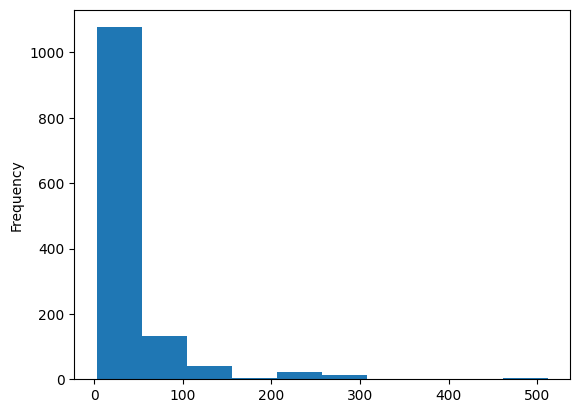

In [35]:
df_titanic.fare.plot.hist()

The documentation for `.plot.hist()` tells us about one option, `bins`, but then refers us to `.plot()` for additional options. If you peek inside `.plot()`, you will find the `legend`, `density`, and `xlim` options, as well as many others.

<Axes: >

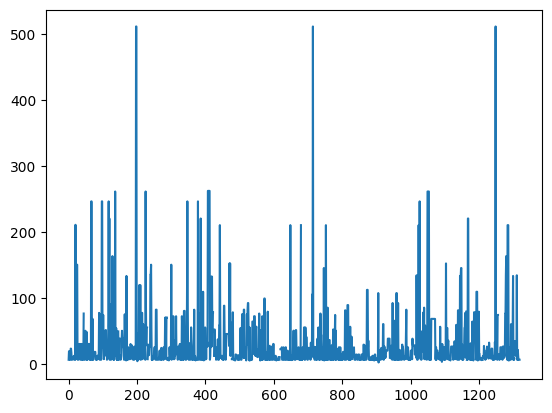

In [37]:
df_titanic.fare.plot()

Try these out to get a feel for what they do. For example, can you figure out how to make the density curve red in the above graph? Or how to change the size of the figure?

You might be surprised that `alpha` is not listed among the options above. This is because `alpha` is an option of the `matplotlib` plotting method that `pandas` calls. (Notice that the last argument of `.plot()` is `**kwds`, for "options to pass to matplotlib plotting method".)